<a href="https://colab.research.google.com/github/KKirsche-l/Data-Science/blob/main/Lecture_7_Neural_Networks_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Let’s take a look at the shape and data type of the training set:

X_train_full.shape



(60000, 28, 28)

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
class_names[y_train_full[10000]]

'Bag'

In [ ]:
X_test[10]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 145, 190,
         97, 109, 105, 187,  76,   0,   0,   0,   2,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  64, 170, 163, 208,
        243, 240, 229, 173, 162, 154,  18,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  39, 158, 196, 149, 191, 199,
        223, 243, 186, 191, 170, 155, 162, 126,  22,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   3,   0, 105, 161, 150, 141, 130, 199, 239,
        229, 220, 188, 244, 145, 128, 142, 151, 175,  23,   0,   2,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 150, 137, 134, 130, 147, 121, 241,
        255, 114, 240, 173, 142, 136, 132, 128, 153, 113,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  17, 157, 129, 146, 149, 137, 141, 177,
        200, 200, 207, 134, 145, 142, 140, 132, 129, 140,   3,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  50, 158, 137, 153, 150, 125, 155, 191,
        175, 141, 165, 166, 153, 130, 129, 132, 141, 149,  18,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  77, 166, 161, 137, 151, 166, 181, 216,
        182, 158, 215, 195, 155, 159, 162, 173, 150, 150,  58,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 104, 159, 170, 140, 132, 182, 198, 208,
        175, 136, 174, 169, 147, 155, 121, 188, 162, 142, 101,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 112, 171, 206, 179, 147, 163, 177, 196,
        192, 146, 187, 153, 142, 144, 136, 245, 202, 132, 137,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 126, 181, 219, 146, 157, 128, 121, 175,
        196, 104, 157, 158, 151, 140, 103,  89, 221, 141, 153,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 157, 175, 216,  55, 175, 153, 151, 188,
        214, 126, 204, 159, 145, 145, 116,  71, 212, 154, 155,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 183, 163, 232,  64, 138, 142, 182, 195,
        200, 158, 231, 146, 130, 161, 132, 105, 225, 146, 157,  10,   0,
          0,   0],
       [  0,   0,   0,   0,   6, 188, 161, 221,  54, 149, 165, 151, 167,
        188, 170, 181, 154, 141, 130, 144,  93, 207, 166, 142,  34,   0,
          0,   0],
       [  0,   0,   0,   0,  42, 182, 165, 236,  29, 146, 170, 141, 166,
        208, 124, 162, 173, 154, 132, 140,  97, 194, 153, 161,  47,   0,
          0,   0],
       [  0,   0,   0,   0,  58, 175, 171, 191,   5, 173, 162, 154, 181,
        207, 100, 161, 179, 155, 146, 149,  76, 192, 162, 150,  62,   0,
          0,   0],
       [  0,   0,   0,   0,  80, 179, 166, 167,  10, 182, 151, 157, 178,
        184, 166, 208, 174, 138, 146, 140,  73, 186, 161, 155,  71,   0,
          0,   0],
       [  0,   0,   0,   0, 100, 165, 171, 138,  51, 194, 157, 133, 187,
        196, 166, 198, 163, 129, 142, 134,  73, 191, 154, 155,  79,   0,
          0,   0],
       [  0,   0,   0,   0, 109, 158, 175, 118,  73, 179, 146, 149, 183,
        207, 141, 184, 171, 153, 137, 147,  73, 195, 157, 154,  85,   0,
          0,   0],
       [  0,   0,   0,   0, 109, 163, 179, 122, 116, 177, 144, 165, 182,
        190, 147, 179, 162, 146, 133, 153,  97, 161, 158, 150,  95,   0,
          0,   0],
       [  0,   0,   0,   0, 107, 158, 167, 163, 105, 137, 161, 163, 203,
        199, 149, 181, 167, 161, 147, 147,  99, 166, 157, 141,  99,   0,
          0,   0],
       [  0,   0,   0,   0, 109, 154, 166, 145,   0,  34,  84,  63, 107,
        149, 132, 153, 129, 124, 149,  56,   0, 114, 159, 141,  97,   0,
          0,   0],
       [  0,   0,   0,   0, 108, 154, 169,  85,   0,   0,   0,   0,   0,
          0,   2,   9,   0,   0,   0,   0,   0,  93, 157, 142,  99,   0,
          0,   0],
       [  0,   0,   0,   0, 101, 153, 169,  80,   0,   3,   0,   1,   0,
          0,   0,   0,   0,   0,   0,   1,   0,  80, 155, 144, 105,   0,
          0,   0],
       [  0,   0,   0,   0, 121, 157, 16

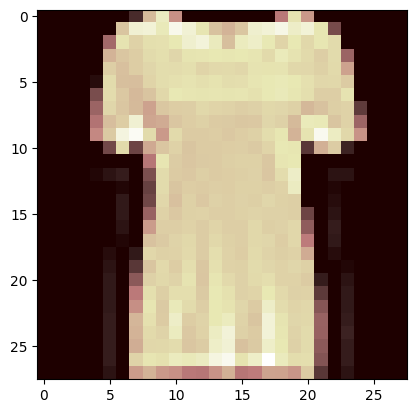

In [ ]:
plt.imshow(X_train_full[10], cmap='pink')
plt.show()

Scaling and creating a validation set

In [ ]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

Creating the model using the Sequential API



1.  The first line creates a Sequential model. This is the simplest kind of Keras model for neural networks that are just composed of a single stack of layers connected sequentially. This is called the Sequential API.
2.  The second line prepares the image for imputtin into the network
3.  The three following lines add 3 layers, each with a different activation function.



In [ ]:

model = keras.models.Sequential([
keras.layers.Flatten(input_shape=[28, 28]),
keras.layers.Dense(300, activation="relu"),
keras.layers.Dense(100, activation="relu"),
keras.layers.Dense(10, activation="softmax")
])

In [ ]:
# Examine the model (note the large number of parameters!)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
 # We can visualise the weights and biases and see how they have been initialised.
 # The initialisation is different at any run of the model

model.layers[1].get_weights()

[array([[-0.03208691,  0.03118064, -0.03094142, ..., -0.06280749,
         -0.01970413, -0.04639797],
        [ 0.03684897,  0.02410465, -0.001518  , ..., -0.03161093,
          0.03941536, -0.04126713],
        [-0.01607715,  0.07233766, -0.06837395, ...,  0.02436662,
          0.05408654, -0.02429946],
        ...,
        [ 0.05258091,  0.06930141, -0.00979295, ...,  0.0617598 ,
          0.03943953,  0.05911246],
        [ 0.02237429, -0.06855027, -0.07388153, ..., -0.06193503,
          0.06292103,  0.06412826],
        [ 0.063557  ,  0.03586622, -0.06448866, ..., -0.03295094,
         -0.06791925,  0.01667324]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [ ]:
# After a model is created, we compile() to specify the loss function and the optimizer to use.

model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])



The loss functions available are listed in https://keras.io/losses. There are many.

The SparseCategoricalCrossentropy class is a loss function that is commonly used in multi-class classification problems where the labels are represented as integers.

In [ ]:
# To train the model, we simply use fit

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8535 - loss: 0.4194 - val_accuracy: 0.8588 - val_loss: 0.4152
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8619 - loss: 0.3972 - val_accuracy: 0.8576 - val_loss: 0.4121
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8638 - loss: 0.3875 - val_accuracy: 0.8702 - val_loss: 0.3758
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8678 - loss: 0.3702 - val_accuracy: 0.8718 - val_loss: 0.3646
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8728 - loss: 0.3583 - val_accuracy: 0.8780 - val_loss: 0.3506
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8773 - loss: 0.3435 - val_accuracy: 0.8764 - val_loss: 0.3469
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8799 - loss: 0.3375 - val_accuracy: 0.8718 - val_loss: 0.3638
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8821 - loss: 0.33

An epoch refers to a complete iteration through a training dataset. During each epoch, the model is trained on the entire training dataset, and the weights of the model are adjusted to minimize the loss function.

In practical terms, an epoch is defined by the number of times the model has seen the entire dataset. For example, if the training dataset has 1000 samples and the model is trained for 10 epochs, then the model has seen the entire dataset 10 times, which means that it has been trained on 10 * 1000 = 10,000 samples in total.

The number of epochs used during training is an important hyperparameter that can affect the performance of the model. If the model is trained for too few epochs, it may underfit.

Accuracy and loss should be in different plots! But I was lazy.




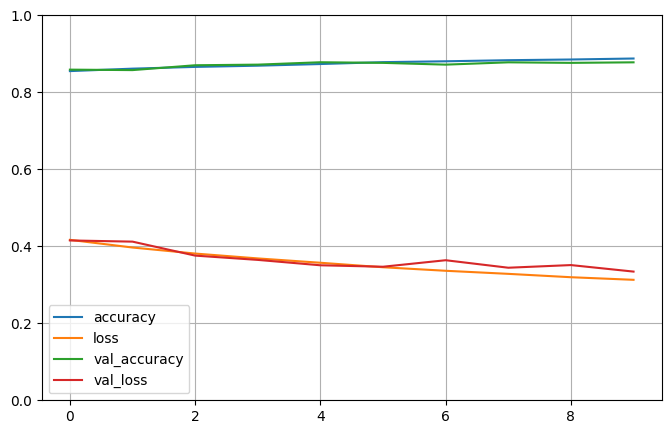

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

Note the shift to the right of the validation curves!

In [ ]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8477 - loss: 56.5617


[60.2807731628418, 0.8413000106811523]

Making Predictions

In [ ]:
X_new = X_test[:5] # The two dots mean all instances from 0 to 4.
y_proba = model.predict(X_new)
y_proba

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

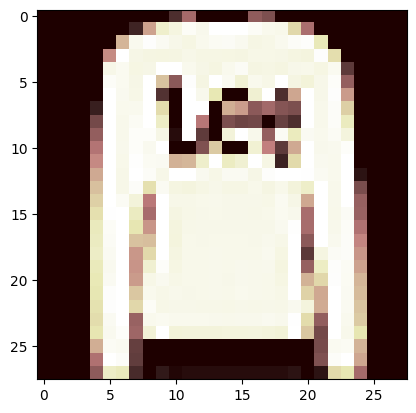

In [ ]:
plt.imshow(X_test[1], cmap='pink')
plt.show()
# class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

#**From MLP to CNNs**

### Comparing CNNs to MLPs: Parameter Sharing vs. Full Connectivity

| **Feature**            | **CNNs (Convolutional Layers)**             | **MLPs (Fully Connected Layers)**        |
|------------------------|---------------------------------------------|------------------------------------------|
| **Connectivity**       | Each neuron connects **only to a local region** | Each neuron connects **to all input pixels** |
| **Parameter Sharing**  | The **same filter weights** are applied **across all locations** | Each weight is **unique** for every input connection |
| **Efficiency**         | **Fewer parameters** (good for large images)  | **Many parameters** (scales poorly with image size) |
| **Spatial Structure**  | **Preserved** (filters detect patterns)       | **Lost** (flattening destroys spatial relationships) |
| **Interpretability**   | Detects **edges, textures, objects**          | Learns **abstract patterns**, harder to interpret |

✅ **CNNs are much more efficient for images** because **filters (kernels) share parameters across different regions**, reducing the number of learnable parameters significantly!


The first problem is the number of parameters. This code aims to demonstrate the difference in the number of parameters between a Multilayer Perceptron (MLP) and a Convolutional Neural Network (CNN) when dealing with image data.

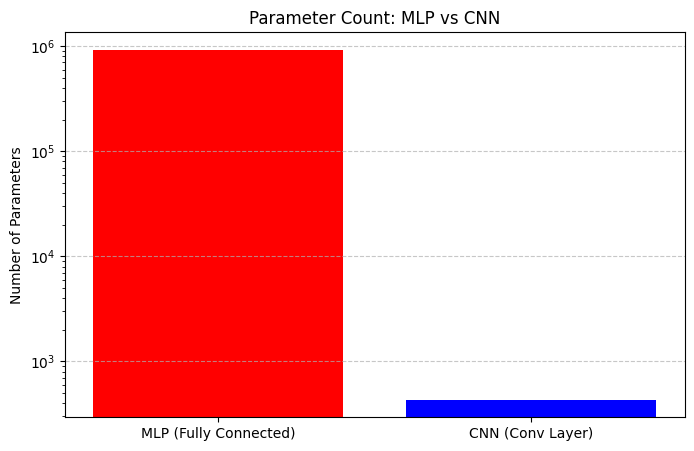

Total parameters in MLP: 924,600
Total parameters in CNN conv layer: 432


In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Define image dimensions
image_channels = 3
image_height = 32
image_width = 32

# Fully Connected (MLP) parameters
input_size = image_channels * image_height * image_width  # 3 * 32 * 32 = 3072
hidden_size = 300
output_size = 10

fc_params = input_size * hidden_size + hidden_size * output_size

# CNN parameters (16 filters, 3x3 kernel, assuming only one conv layer)
num_filters = 16 # Each filter slides over the image and learns a different feature.
kernel_size = 3 # A 3×3 kernel means each filter covers a 3×3 pixel region at a time.
cnn_params = (kernel_size * kernel_size * image_channels * num_filters) # Approx, missing the biases

# Visualization
labels = ["MLP (Fully Connected)", "CNN (Conv Layer)"]
param_counts = [fc_params, cnn_params]

plt.figure(figsize=(8, 5))
plt.bar(labels, param_counts, color=['red', 'blue'])
plt.ylabel("Number of Parameters")
plt.title("Parameter Count: MLP vs CNN")
plt.yscale('log')  # Log scale to highlight large differences
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Print exact parameter counts
print(f"Total parameters in MLP: {fc_params:,}")
print(f"Total parameters in CNN conv layer: {cnn_params:,}")


# The second problem is that MLP treats all pixels equally

100%|██████████| 26.4M/26.4M [00:01<00:00, 16.4MB/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 271kB/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 4.91MB/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 8.17MB/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



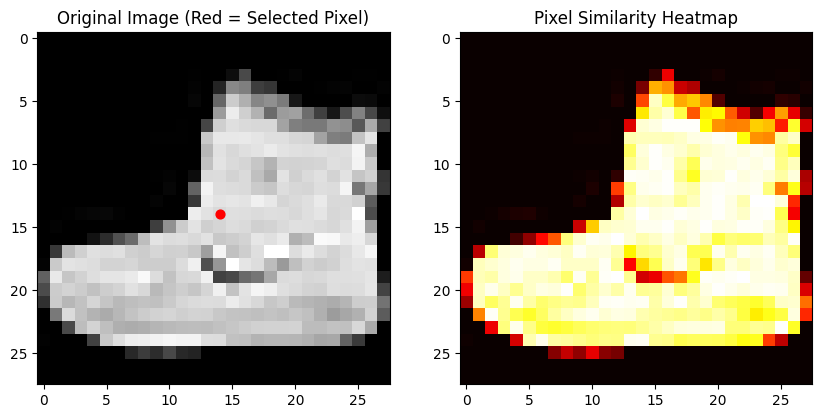

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Load Fashion-MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])
dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
image, label = dataset[0]  # Get the first image

# Convert to NumPy
image_np = image.squeeze().numpy()  # Shape (28, 28)

# Choose a central pixel (e.g., center of the image)
center_x, center_y = 14, 14
center_value = image_np[center_y, center_x]

# Compute similarity (inverse of absolute difference)
similarity_map = 1 - np.abs(image_np - center_value)

# Plot original image
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image_np, cmap='gray')
ax[0].scatter(center_x, center_y, color='red', marker='o', s=40)  # Mark the selected pixel
ax[0].set_title("Original Image (Red = Selected Pixel)")

# Plot similarity heatmap
ax[1].imshow(similarity_map, cmap='hot')  # 'hot' colormap to highlight similarity
ax[1].set_title("Pixel Similarity Heatmap")

plt.show()


# How Can we solve this problem?

MLPs flatten images, losing spatial structure.
CNNs use small local receptive fields to capture edges, textures, and shapes.

How Local Receptive Fields Work:

*   Each filter focuses on a small region (3×3 in this example).
*   Filters detect edges, textures, or patterns based on pixel intensity differences.
*   Higher layers in CNNs combine these small features into larger, meaningful representations (e.g., shirt, shoe).


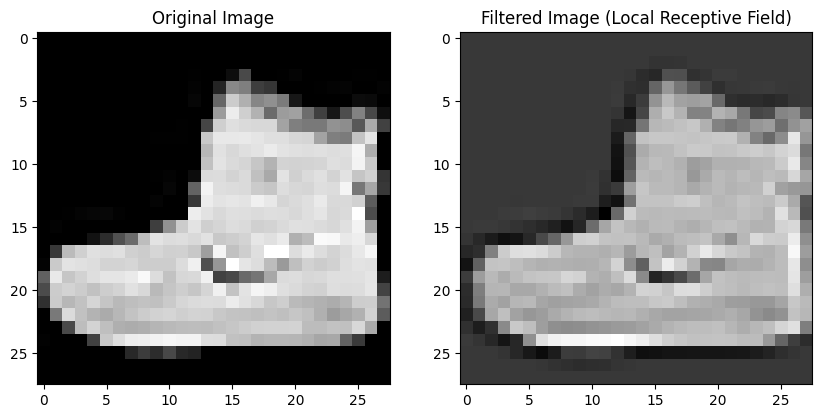

In [ ]:
from scipy.ndimage import convolve

# Define a simple 3x3 edge-detection filter (receptive field)
edge_filter = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
])

# Apply the filter to the image
filtered_image = convolve(image_np, edge_filter, mode='constant')

# Show original vs. filtered image
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image_np, cmap='gray')
ax[0].set_title("Original Image")
ax[1].imshow(filtered_image, cmap='gray')
ax[1].set_title("Filtered Image (Local Receptive Field)")
plt.show()


# What does a convolution do?

Convolution applies a weighted sum over a small region (kernel) of an image.
Each pixel in the output is computed as:


New Pixel=∑(Kernel×Region of Image)


Original 5x5 Image Region:
[[0.3882353  0.95686275 0.87058824 0.8627451  0.85490197]
 [0.21568628 0.9254902  0.89411765 0.9019608  0.89411765]
 [0.92941177 0.8862745  0.8509804  0.8745098  0.87058824]
 [0.89411765 0.8117647  0.8352941  0.8666667  0.85490197]
 [0.8509804  0.8862745  0.78431374 0.8039216  0.827451  ]]

Manual Convolution Result (3x3 output):
[[ 1.4117647   0.02352941  0.24313724]
 [ 0.73333333 -0.18823528  0.02745098]
 [-0.42352939 -0.08235294  0.23137254]]

Scipy Convolution Result (3x3 output):
[[ 1.0078431   4.3607845   2.4235294   2.4862745   4.1803923 ]
 [-2.3607843   1.4117647   0.02352941  0.24313724  2.7882352 ]
 [ 3.7019608   0.73333335 -0.18823528  0.02745098  2.572549  ]
 [ 2.7882352  -0.4235294  -0.08235294  0.23137254  2.5960784 ]
 [ 4.2156863   2.9137254   2.0705884   2.2627451   4.0941176 ]]


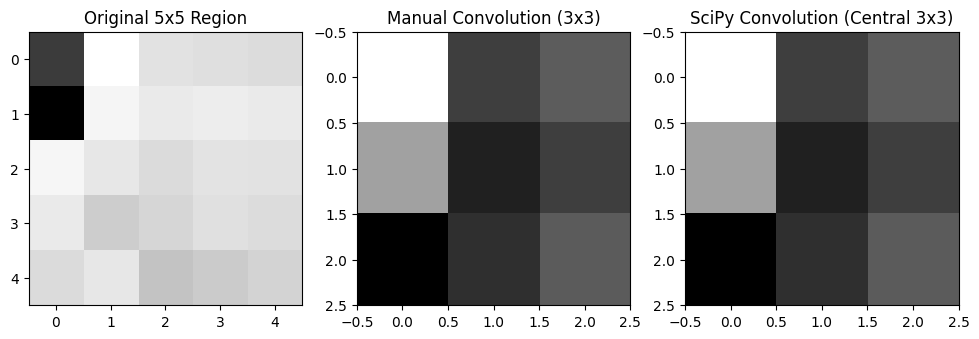

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

# Load Fashion-MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])
dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
image, label = dataset[0]  # Get the first image

# Convert to NumPy
image_np = image.squeeze().numpy()  # Shape (28, 28)

# Define a 3x3 edge detection kernel
kernel = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
])

# Extract a 5x5 region from the image for clarity (centered around pixel (14,14))
region = image_np[12:17, 12:17]

# Apply convolution manually on the center 3x3 region
def manual_convolution(region, kernel):
    output = np.zeros((3, 3))  # Output is 3x3 because we are convolving within 5x5 region

    for i in range(3):  # Slide over the 3x3 region within 5x5
        for j in range(3):
            patch = region[i:i+3, j:j+3]  # Extract 3x3 region
            output[i, j] = np.sum(patch * kernel)  # Weighted sum (convolution)

    return output

# Compute convolution manually on the 5x5 region
manual_result = manual_convolution(region, kernel)

# Compute convolution using scipy.ndimage.convolve() on the same 5x5 region
scipy_result = convolve(region, kernel, mode='constant')

# Print results
print("Original 5x5 Image Region:")
print(region)

print("\nManual Convolution Result (3x3 output):")
print(manual_result)

print("\nScipy Convolution Result (3x3 output):")
print(scipy_result)

# Visualization (Zoomed in on central 3x3 region of SciPy result)
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

ax[0].imshow(region, cmap='gray')
ax[0].set_title("Original 5x5 Region")

ax[1].imshow(manual_result, cmap='gray')
ax[1].set_title("Manual Convolution (3x3)")

# Zoom in on central 3x3 of SciPy result
scipy_center = scipy_result[1:4, 1:4]  # Extract central 3x3
ax[2].imshow(scipy_center, cmap='gray')
ax[2].set_title("SciPy Convolution (Central 3x3)")

plt.show()
